# Train a ConvNet!
We now have a generic solver and a bunch of modularized layers. It's time to put it all together, and train a ConvNet to recognize the classes in CIFAR-10. In this notebook we will walk you through training a simple two-layer ConvNet and then set you free to build the best net that you can to perform well on CIFAR-10.

Open up the file `cs231n/classifiers/convnet.py`; you will see that the `two_layer_convnet` function computes the loss and gradients for a two-layer ConvNet. Note that this function uses the "sandwich" layers defined in `cs231n/layer_utils.py`. 

In [9]:
# As usual, a bit of setup

import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifier_trainer import ClassifierTrainer
from cs231n.gradient_check import eval_numerical_gradient
from cs231n.classifiers.convnet import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    
    # Transpose so that channels come first
    X_train = X_train.transpose(0, 3, 1, 2).copy()
    X_val = X_val.transpose(0, 3, 1, 2).copy()
    x_test = X_test.transpose(0, 3, 1, 2).copy()

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3, 32, 32)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3, 32, 32)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


# Sanity check loss
After you build a new network, one of the first things you should do is sanity check the loss. When we use the softmax loss, we expect the loss for random weights (and no regularization) to be about `log(C)` for `C` classes. When we add regularization this should go up.

In [14]:
model = init_two_layer_convnet()

X = np.random.randn(100, 3, 32, 32)
y = np.random.randint(10, size=100)

loss, _ = two_layer_convnet(X, model, y, reg=0)

# Sanity check: Loss should be about log(10) = 2.3026
print('Sanity check loss (no regularization): ', loss)

# Sanity check: Loss should go up when you add regularization
loss, _ = two_layer_convnet(X, model, y, reg=1)
print('Sanity check loss (with regularization): ', loss)

A1 (100, 32, 16, 16)
W2 (8192, 10)
Sanity check loss (no regularization):  2.3026479656868655
A1 (100, 32, 16, 16)
W2 (8192, 10)
Sanity check loss (with regularization):  2.344701780445477


# Gradient check
After the loss looks reasonable, you should always use numeric gradient checking to make sure that your backward pass is correct. When you use numeric gradient checking you should use a small amount of artifical data and a small number of neurons at each layer.

In [12]:
num_inputs = 2
input_shape = (3, 16, 16)
reg = 0.0
num_classes = 10
X = np.random.randn(num_inputs, *input_shape)
y = np.random.randint(num_classes, size=num_inputs)

model = init_two_layer_convnet(num_filters=3, filter_size=3, input_shape=input_shape)
loss, grads = two_layer_convnet(X, model, y)
for param_name in sorted(grads):
    f = lambda _: two_layer_convnet(X, model, y)[0]
    param_grad_num = eval_numerical_gradient(f, model[param_name], verbose=False, h=1e-6)
    e = rel_error(param_grad_num, grads[param_name])
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)

(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)

(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)

(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)

(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)

(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)
(2, 3, 8, 8)

# Overfit small data
A nice trick is to train your model with just a few training samples. You should be able to overfit small datasets, which will result in very high training accuracy and comparatively low validation accuracy.

In [5]:
# Use a two-layer ConvNet to overfit 50 training examples.

model = init_two_layer_convnet()
trainer = ClassifierTrainer()
best_model, loss_history, train_acc_history, val_acc_history = trainer.train(
          X_train[:50], y_train[:50], X_val, y_val, model, two_layer_convnet,
          reg=0.001, momentum=0.9, learning_rate=0.0001, batch_size=10, num_epochs=10,
          verbose=True)

starting iteration  0
Finished epoch 0 / 10: cost 2.293673, train: 0.160000, val 0.079000, lr 1.000000e-04


/mnt/c/Users/Sashank/Documents/MSCS/DL/HW1/f19cs7643_hw1_starter/assignment/1_cs231n/cs231n/layers.py:357: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(np.log(probs[np.arange(N), y])) / N


Finished epoch 1 / 10: cost inf, train: 0.100000, val 0.107000, lr 9.500000e-05
Finished epoch 2 / 10: cost inf, train: 0.060000, val 0.087000, lr 9.025000e-05
starting iteration  10
Finished epoch 3 / 10: cost inf, train: 0.140000, val 0.079000, lr 8.573750e-05
Finished epoch 4 / 10: cost inf, train: 0.060000, val 0.060000, lr 8.145062e-05
starting iteration  20
Finished epoch 5 / 10: cost inf, train: 0.120000, val 0.075000, lr 7.737809e-05
Finished epoch 6 / 10: cost inf, train: 0.120000, val 0.110000, lr 7.350919e-05
starting iteration  30
Finished epoch 7 / 10: cost inf, train: 0.080000, val 0.066000, lr 6.983373e-05
Finished epoch 8 / 10: cost inf, train: 0.100000, val 0.114000, lr 6.634204e-05
starting iteration  40
Finished epoch 9 / 10: cost inf, train: 0.040000, val 0.084000, lr 6.302494e-05
Finished epoch 10 / 10: cost inf, train: 0.060000, val 0.071000, lr 5.987369e-05
finished optimization. best validation accuracy: 0.114000


Plotting the loss, training accuracy, and validation accuracy should show clear overfitting:

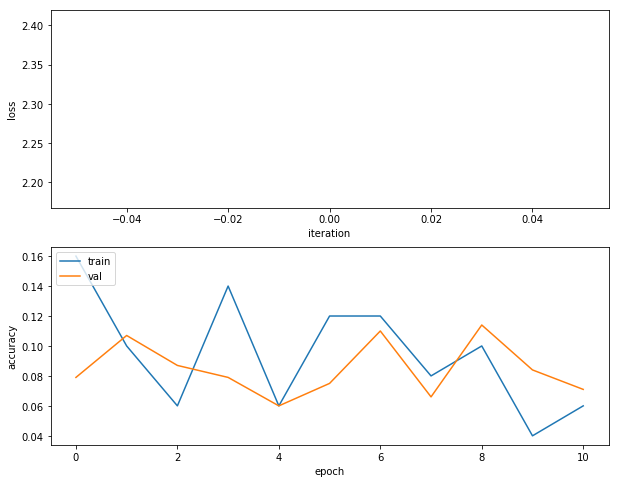

In [6]:
plt.subplot(2, 1, 1)
plt.plot(loss_history)
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(train_acc_history)
plt.plot(val_acc_history)
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# Train the net
Once the above works, training the net is the next thing to try. You can set the `acc_frequency` parameter to change the frequency at which the training and validation set accuracies are tested. If your parameters are set properly, you should see the training and validation accuracy start to improve within a hundred iterations, and you should be able to train a reasonable model with just one epoch.

Using the parameters below you should be able to get around 50% accuracy on the validation set.

In [7]:
model = init_two_layer_convnet(filter_size=7)
trainer = ClassifierTrainer()
best_model, loss_history, train_acc_history, val_acc_history = trainer.train(
          X_train, y_train, X_val, y_val, model, two_layer_convnet,
          reg=0.001, momentum=0.9, learning_rate=0.0001, batch_size=50, num_epochs=1,
          acc_frequency=50, verbose=True)

starting iteration  0
Finished epoch 0 / 1: cost 2.314590, train: 0.069000, val 0.081000, lr 1.000000e-04


/mnt/c/Users/Sashank/Documents/MSCS/DL/HW1/f19cs7643_hw1_starter/assignment/1_cs231n/cs231n/layers.py:357: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(np.log(probs[np.arange(N), y])) / N


starting iteration  10
starting iteration  20
starting iteration  30
starting iteration  40
starting iteration  50
Finished epoch 0 / 1: cost inf, train: 0.087000, val 0.111000, lr 1.000000e-04
starting iteration  60


/mnt/c/Users/Sashank/Documents/MSCS/DL/HW1/f19cs7643_hw1_starter/assignment/1_cs231n/cs231n/layers.py:354: RuntimeWarning: invalid value encountered in subtract
  probs = np.exp(x - np.max(x, axis=1, keepdims=True))
/mnt/c/Users/Sashank/Documents/MSCS/DL/HW1/f19cs7643_hw1_starter/assignment/1_cs231n/cs231n/layers.py:80: RuntimeWarning: invalid value encountered in less
  mask = x < 0
/mnt/c/Users/Sashank/Documents/MSCS/DL/HW1/f19cs7643_hw1_starter/assignment/1_cs231n/cs231n/fast_layers.py:149: RuntimeWarning: divide by zero encountered in true_divide
  dx_reshaped /= np.sum(mask, axis=(3, 5), keepdims=True)
/mnt/c/Users/Sashank/Documents/MSCS/DL/HW1/f19cs7643_hw1_starter/assignment/1_cs231n/cs231n/fast_layers.py:149: RuntimeWarning: invalid value encountered in true_divide
  dx_reshaped /= np.sum(mask, axis=(3, 5), keepdims=True)
/mnt/c/Users/Sashank/Documents/MSCS/DL/HW1/f19cs7643_hw1_starter/assignment/1_cs231n/cs231n/layers.py:106: RuntimeWarning: invalid value encountered in less
 

starting iteration  70
starting iteration  80
starting iteration  90
starting iteration  100
Finished epoch 0 / 1: cost nan, train: 0.109000, val 0.087000, lr 1.000000e-04
starting iteration  110
starting iteration  120
starting iteration  130
starting iteration  140
starting iteration  150
Finished epoch 0 / 1: cost nan, train: 0.106000, val 0.087000, lr 1.000000e-04
starting iteration  160
starting iteration  170
starting iteration  180
starting iteration  190
starting iteration  200
Finished epoch 0 / 1: cost nan, train: 0.094000, val 0.087000, lr 1.000000e-04
starting iteration  210
starting iteration  220
starting iteration  230
starting iteration  240
starting iteration  250
Finished epoch 0 / 1: cost nan, train: 0.114000, val 0.087000, lr 1.000000e-04
starting iteration  260
starting iteration  270
starting iteration  280
starting iteration  290
starting iteration  300
Finished epoch 0 / 1: cost nan, train: 0.092000, val 0.087000, lr 1.000000e-04
starting iteration  310
starting

# Visualize weights
We can visualize the convolutional weights from the first layer. If everything worked properly, these will usually be edges and blobs of various colors and orientations.

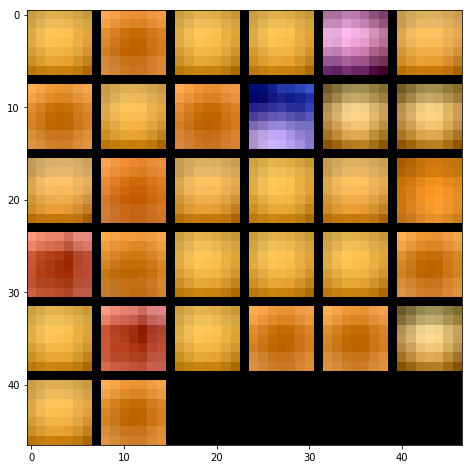

In [8]:
from cs231n.vis_utils import visualize_grid

grid = visualize_grid(best_model['W1'].transpose(0, 2, 3, 1))
plt.imshow(grid.astype('uint8'))